In [1]:
import numpy as np
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
from IPython.display import HTML
from qwanta import Experiment
import matplotlib
import seaborn as sns

In [2]:
## Architype 2
def distance_to_prob(distance, time):
    p = [1, 0, 0, 0]
    return p

def adjusted_rate(rl, dl, ds, loss=0.1):
    return rl*10**((dl - ds)*loss/10)

minimal_edges_infos = [(0.0001, 100, 100), (0.0001, 175, 25), 
                       (0.0001, 150, 50) ,(0.0001, 125, 75)]
adjusted_rate_list = [adjusted_rate(*i) for i in minimal_edges_infos]

node_number = 3
n_hops = [2]
nodes_name = [f'Node {i}' for i in range(node_number)]
distance_btw = 100 # km
edges_loss = [0.1]*(node_number-1) # dB/km
loss = 0.1

nodes_info_exp = [{
            'Node 0': {'coordinate': (0, 0, 0)},
            'Node 1': {'coordinate': (100, 0, 0)},
            'Node 2': {'coordinate': (200, 0, 0)},
            'numPhysicalBuffer': 20,
            'numInternalEncodingBuffer': 20,
            'numInternalDetectingBuffer': 10,
            'numInternalInterfaceBuffer': 2,
        },
        {
            'Node 0': {'coordinate': (0, 0, 0)},
            'Node 1': {'coordinate': (25, 0, 0)},
            'Node 2': {'coordinate': (200, 0, 0)},
            'numPhysicalBuffer': 20,
            'numInternalEncodingBuffer': 20,
            'numInternalDetectingBuffer': 10,
            'numInternalInterfaceBuffer': 2,
        },
        {  
            'Node 0': {'coordinate': (0, 0, 0)},
            'Node 1': {'coordinate': (50, 0, 0)},
            'Node 2': {'coordinate': (200, 0, 0)},
            'numPhysicalBuffer': 20,
            'numInternalEncodingBuffer': 20,
            'numInternalDetectingBuffer': 10,
            'numInternalInterfaceBuffer': 2,
        },
        {  
            'Node 0': {'coordinate': (0, 0, 0)},
            'Node 1': {'coordinate': (75, 0, 0)},
            'Node 2': {'coordinate': (200, 0, 0)},
            'numPhysicalBuffer': 20,
            'numInternalEncodingBuffer': 20,
            'numInternalDetectingBuffer': 10,
            'numInternalInterfaceBuffer': 2,
        },
]
bias_edge = [{
        ('Node 0', 'Node 1'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': loss,
        'light speed': 300000,
        'Pulse rate': 0.0001,
        },
        ('Node 1', 'Node 2'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': loss,
        'light speed': 300000,
        'Pulse rate': 0.0001,
        }
    },
    {
        ('Node 0', 'Node 1'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': loss,
        'light speed': 300000,
        'Pulse rate': 0.0001,
        },
        ('Node 1', 'Node 2'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': loss,
        'light speed': 300000,
        'Pulse rate': 0.0001,
        }
    },
    {
        ('Node 0', 'Node 1'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': loss,
        'light speed': 300000,
        'Pulse rate': 0.0001,
        },
        ('Node 1', 'Node 2'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': loss,
        'light speed': 300000,
        'Pulse rate': 0.0001,
        }
    },
    {
        ('Node 0', 'Node 1'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': loss,
        'light speed': 300000,
        'Pulse rate': 0.0001,
        },
        ('Node 1', 'Node 2'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': loss,
        'light speed': 300000,
        'Pulse rate': 0.0001,
        }
    },
]

e_tl, vis_a = Experiment.read_timeline_from_csv(f'exper_ID9_2hops_1setup_ArcType2.xlsx', excel=True) # exper_id7_Logical_{i}hops.xlsx
exp_names = ['Center-D100-L0_1',
             'Bias-Left_D25-L0-1',
             'Bias-Left_D50-L0-1',
             'Bias-Left_D75-L0-1']

timelines = {exp_name: e_tl for exp_name in exp_names}
nodes_information = {exp_name: nodes_info_exp[index] for index, exp_name in enumerate(exp_names)}
networks = {exp_name: bias_edge[index] for index, exp_name in enumerate(exp_names)}
mem_func = {exp_name: None for exp_name in exp_names}
sim_time = {exp_name: None for exp_name in exp_names}
labels = {exp_name: 'k' for exp_name in exp_names}

In [4]:
p = [1]
exper_architecture2 = Experiment(networks, timelines, nodes_info=nodes_information, memFunc=mem_func, simTime=sim_time,
                 photon_channel=p, collect_fidelity_history=False, repeat=10,
                 label_records=labels,path='exp_ID9', message_log='exp_ID9_ArcType2_b', progress_bar=True)
exper_architecture2.run()

Experiments executed:   0%|          | 0/4 [00:00<?, ?it/s]

Parameters executed:   0%|          | 0/1 [00:00<?, ?it/s]

Parameters executed:   0%|          | 0/1 [00:00<?, ?it/s]

Parameters executed:   0%|          | 0/1 [00:00<?, ?it/s]

Parameters executed:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# AWTPQ = Average waiting time of each physical qubit encoded to logical qubit
col_name = {'AWTPQ ', 'Node', 'index', 'Experiment'}
experiemnt_results = exper_architecture2.results()
data_list = []
for exp_num, exp_name in enumerate(exp_names):
    for index in range(9000):
        all_mean_qubit_wt_left, all_mean_qubit_wt_right, time = [], [], []
        for repeat in range(10):
            qubits_left = experiemnt_results[exp_name][0][repeat]['Qubits waiting time'][index]['Node 0']
            qubits_right = experiemnt_results[exp_name][0][repeat]['Qubits waiting time'][index]['Node 2']

            mean_qubit_wt_left, mean_qubit_wt_right = np.mean(qubits_left), np.mean(qubits_right)
            all_mean_qubit_wt_left.append(mean_qubit_wt_left)
            all_mean_qubit_wt_right.append(mean_qubit_wt_right)
            time.append(experiemnt_results[exp_name][0][repeat]['Qubits waiting time'][index]['Time'])

        all_mean_time = np.mean(time)
        all_std_time = np.std(time)
        all_mean_left, all_mean_right = np.mean(all_mean_qubit_wt_left), np.mean(all_mean_qubit_wt_right)
        tmp_left = {'Experiment':exp_name, 'AWTPQ': all_mean_left, 'Node': 'Node 0', 'index':index, 'Time':all_mean_time, 'STD': all_std_time}
        tmp_right = {'Experiment':exp_name, 'AWTPQ': all_mean_right, 'Node': 'Node 2', 'index':index, 'Time':all_mean_time, 'STD': all_std_time}
        data_list.append(tmp_left)
        data_list.append(tmp_right)

dataset_architecture2 = pd.DataFrame(data_list)
dataset_architecture2

Experiment    AWTPQ    Node  index       Time       STD
0        Center-D100-L0_1  0.00212  Node 0      0    0.01027  0.002071
1        Center-D100-L0_1  0.00186  Node 2      0    0.01027  0.002071
2        Center-D100-L0_1  0.00271  Node 0      1    0.01700  0.002314
3        Center-D100-L0_1  0.00186  Node 2      1    0.01700  0.002314
4        Center-D100-L0_1  0.00171  Node 0      2    0.02330  0.003179
...                   ...      ...     ...    ...        ...       ...
71995  Bias-Left_D75-L0-1  0.00125  Node 2   8997  111.92108  0.325240
71996  Bias-Left_D75-L0-1  0.02631  Node 0   8998  111.93518  0.326971
71997  Bias-Left_D75-L0-1  0.00125  Node 2   8998  111.93518  0.326971
71998  Bias-Left_D75-L0-1  0.02591  Node 0   8999  111.94699  0.327803
71999  Bias-Left_D75-L0-1  0.00125  Node 2   8999  111.94699  0.327803

[72000 rows x 6 columns]

In [ ]:
df = dataset_architecture2
arc = ['Architecture 2']*len(df)
df['Architecture'] = arc
df.to_csv('exp_id9/exp_id9_arch2_b_results_df.csv')

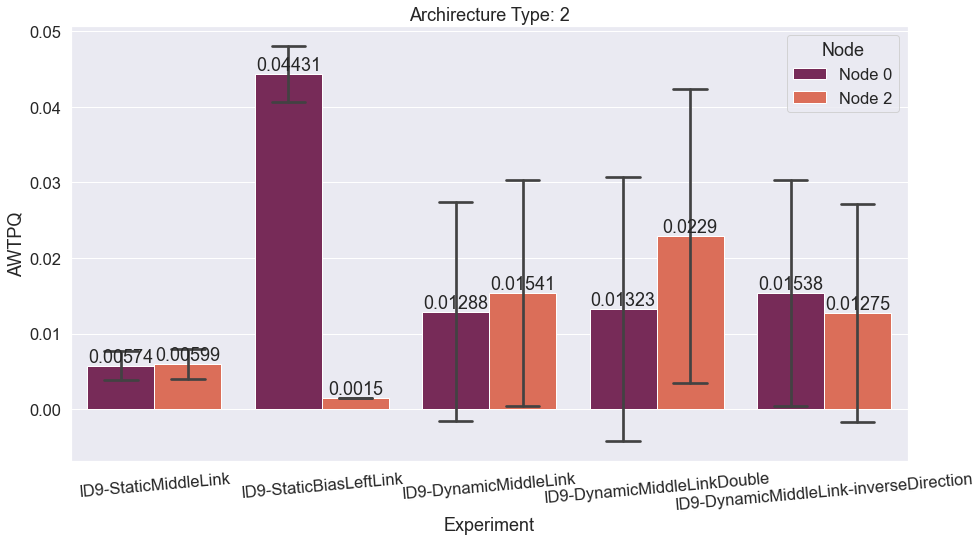

In [21]:
plt.figure(figsize = (15,8))
sns.set(font_scale = 1.5)
ax = sns.barplot(data=dataset_architecture2, x='Experiment', y='AWTPQ', hue='Node', ci='sd',palette="rocket" ,capsize=0.2)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 5)
#ax.set_ylim(0, 0.005)
ax.set_title('Archirecture Type: 2')
plt.savefig('exp_id9/exp_id9_architype2_loss_10repeated.png')

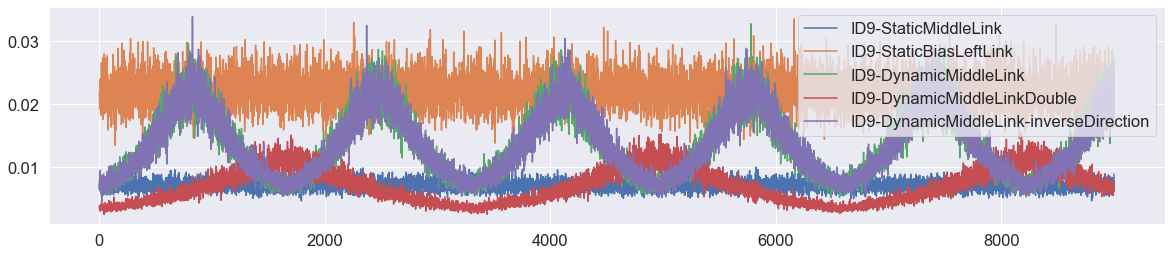

In [22]:
df = dataset_architecture2
plt.figure(figsize = (20,4))
for name in exp_names:
    time_diff_list = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')]['Time'].diff()
    
    plt.plot(time_diff_list.to_list()[1:], label=name)
plt.legend()
plt.savefig('exp_id9/exp_id9_architype2_time_diff_loss_10repeated.png')

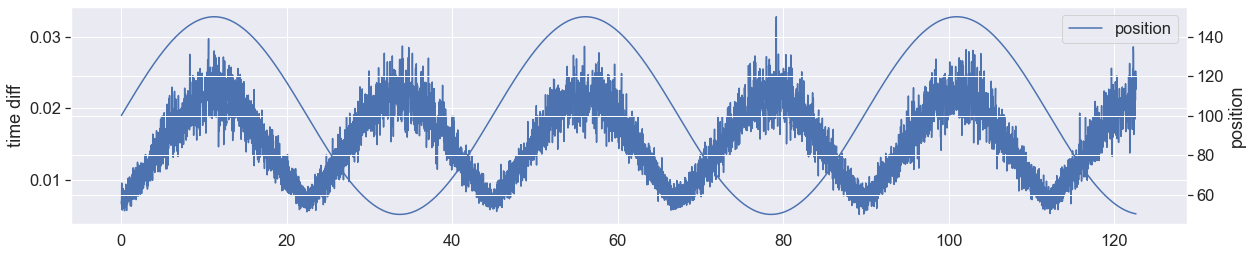

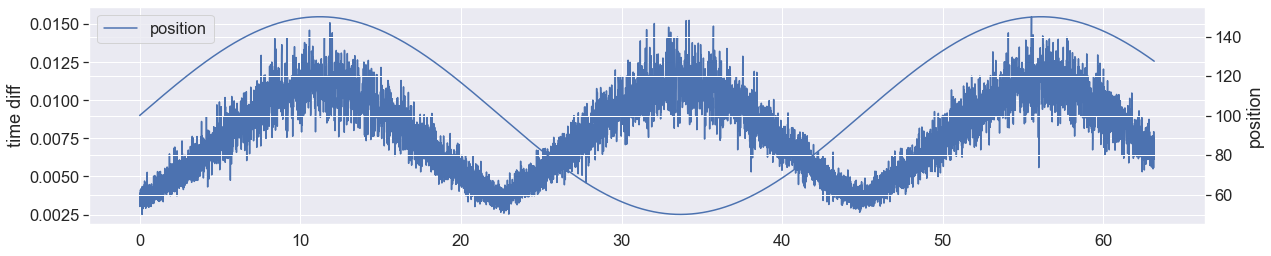

In [19]:
df = dataset_architecture2

for name in ['ID9-DynamicMiddleLink', 'ID9-DynamicMiddleLinkDouble']: # exp_names
    time_stamp = np.array(df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')]['Time'].to_list())
    coordinate_x = time_to_coordinate(time_stamp)[0]
    time_diff_list = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')]['Time'].diff()
    fig,ax = plt.subplots(figsize = (20,4))
    ax.plot(time_stamp[1:], time_diff_list.to_list()[1:], label='time diff')
    ax.set_ylabel('time diff')
    ax2=ax.twinx()
    ax2.plot(time_stamp, coordinate_x, label='position')
    ax2.set_ylabel('position')
    plt.legend()

In [20]:
time_stamp

array([7.17036519e-03, 1.08206324e-02, 1.47206612e-02, ...,
       6.31454173e+01, 6.31521781e+01, 6.31583538e+01])

In [9]:
df = dataset_architecture2
dummy = []
for name in exp_names:
    first_mean = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')][['Time', 'STD']].head(1).iloc[0]['Time']
    first_std = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')][['Time', 'STD']].head(1).iloc[0]['STD']
    last_mean = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')][['Time', 'STD']].tail(1).iloc[0]['Time']
    last_std = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')][['Time', 'STD']].tail(1).iloc[0]['STD']
    #print(f'{name}: first: {first_mean} STD: {first_std}, last: {last_mean} STD: {last_std}')
    dummy.append([first_mean, first_std, last_mean, last_std])
    #print(f'{first_mean}\t{first_std}\t{last_mean}\t{last_std}')
np.savetxt('exp_id9/exp_id9_a2_loss.csv', np.array(dummy), delimiter=",")

<AxesSubplot:xlabel='AWTPQ', ylabel='Count'>

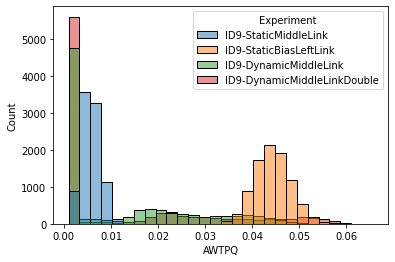

In [21]:
sns.histplot(data=df.loc[(df['Node'] == 'Node 0') & (df['Experiment'] != 'ID9-DynamicMiddleLink-inverseDirection')], x='AWTPQ', hue='Experiment')
#sns.histplot(data=df.loc[df['Node'] == 'Node 2'], x='AWTPQ', hue='Experiment')